In [1]:
!nvidia-smi

Mon Nov 11 09:35:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 24.5 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!unzip /content/final.zip

Archive:  /content/final.zip
   creating: final/
  inflating: final/data.yaml         
   creating: final/test/
   creating: final/test/images/
  inflating: final/test/images/Hello.5786279a-9e83-11ef-b7cc-18473dbad030.jpg  
  inflating: final/test/images/Hello.61220ca2-9e83-11ef-89f2-18473dbad030.jpg  
  inflating: final/test/images/Hello.625572c0-9e83-11ef-892b-18473dbad030.jpg  
  inflating: final/test/images/Hello.638919a8-9e83-11ef-bb33-18473dbad030.jpg  
  inflating: final/test/images/Hello.672721ab-9e83-11ef-bf20-18473dbad030.jpg  
  inflating: final/test/images/IloveYou.e7009346-9e83-11ef-835d-18473dbad030.jpg  
  inflating: final/test/images/IloveYou.ea9ac741-9e83-11ef-84b9-18473dbad030.jpg  
  inflating: final/test/images/IloveYou.ebcdc730-9e83-11ef-9981-18473dbad030.jpg  
  inflating: final/test/images/IloveYou.ed019e48-9e83-11ef-b756-18473dbad030.jpg  
  inflating: final/test/images/IloveYou.ee351d3f-9e83-11ef-8fc5-18473dbad030.jpg  
  inflating: final/test/images/No.b037d23

In [5]:
!yolo task=detect mode=train data="/content/final/data.yaml" model="yolo11n.pt" epochs=50 imgsz=640


100% 5.35M/5.35M [00:00<00:00, 112MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/final/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

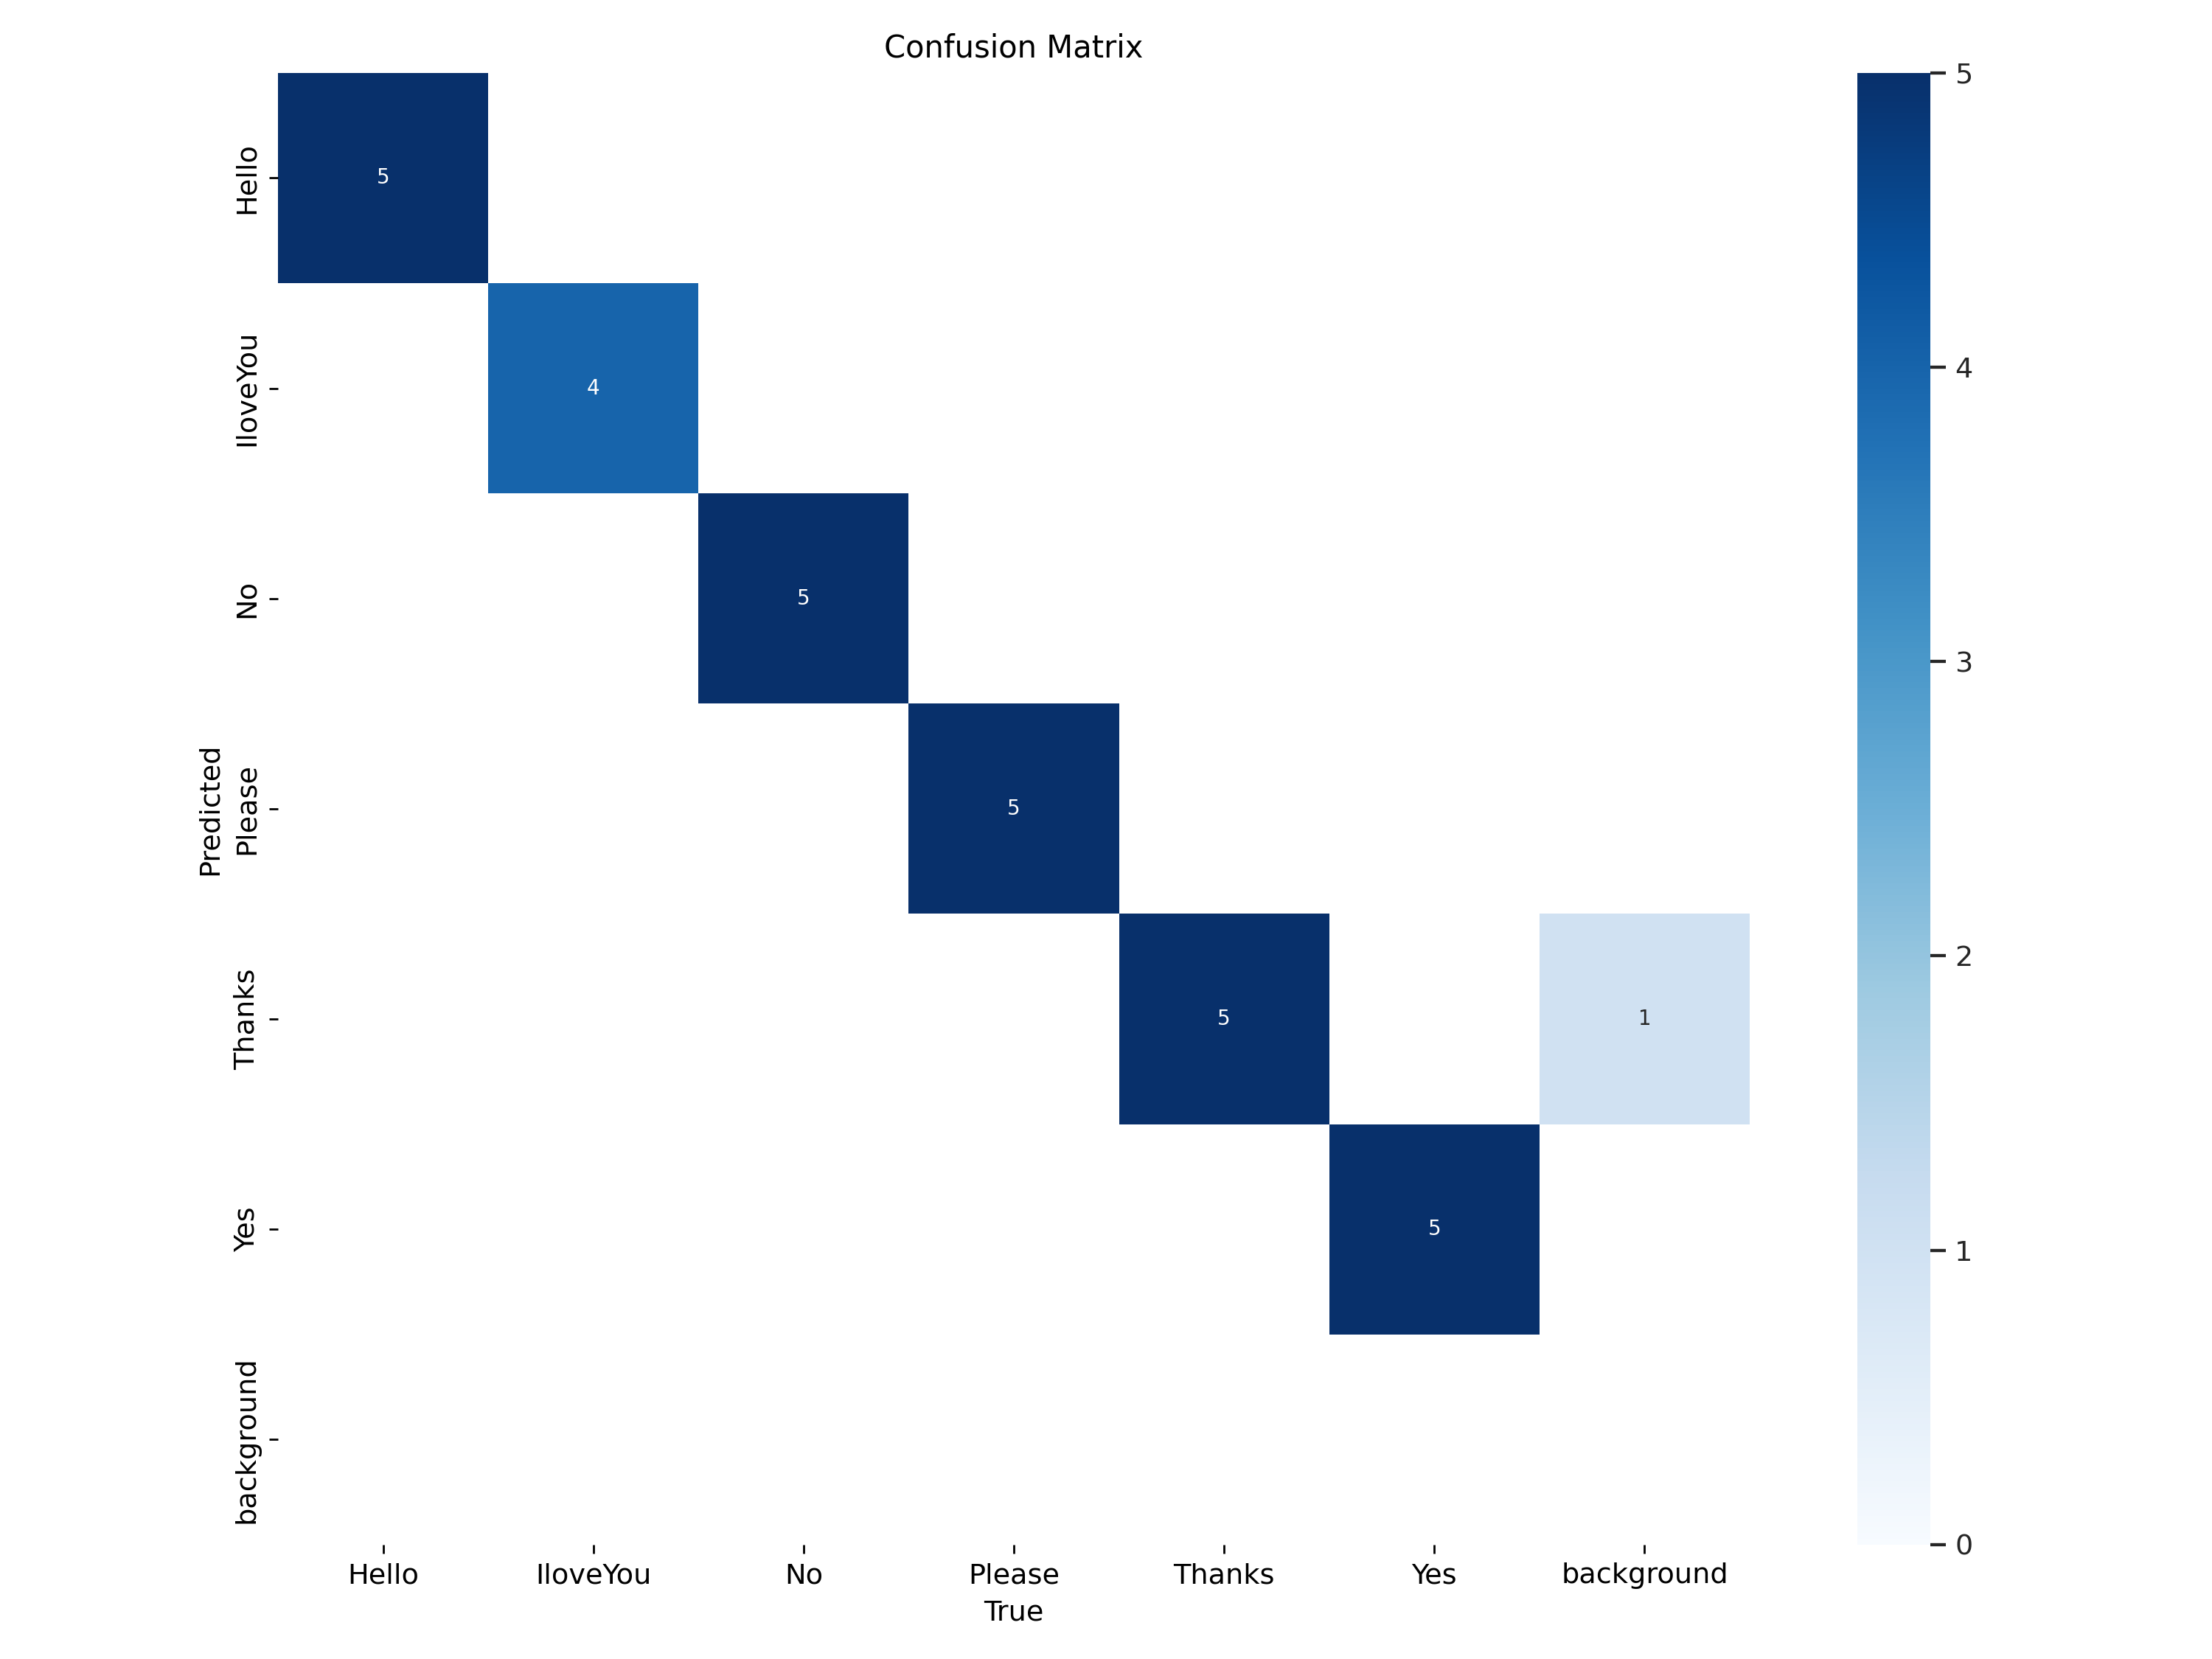

In [6]:
from IPython.display import Image
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

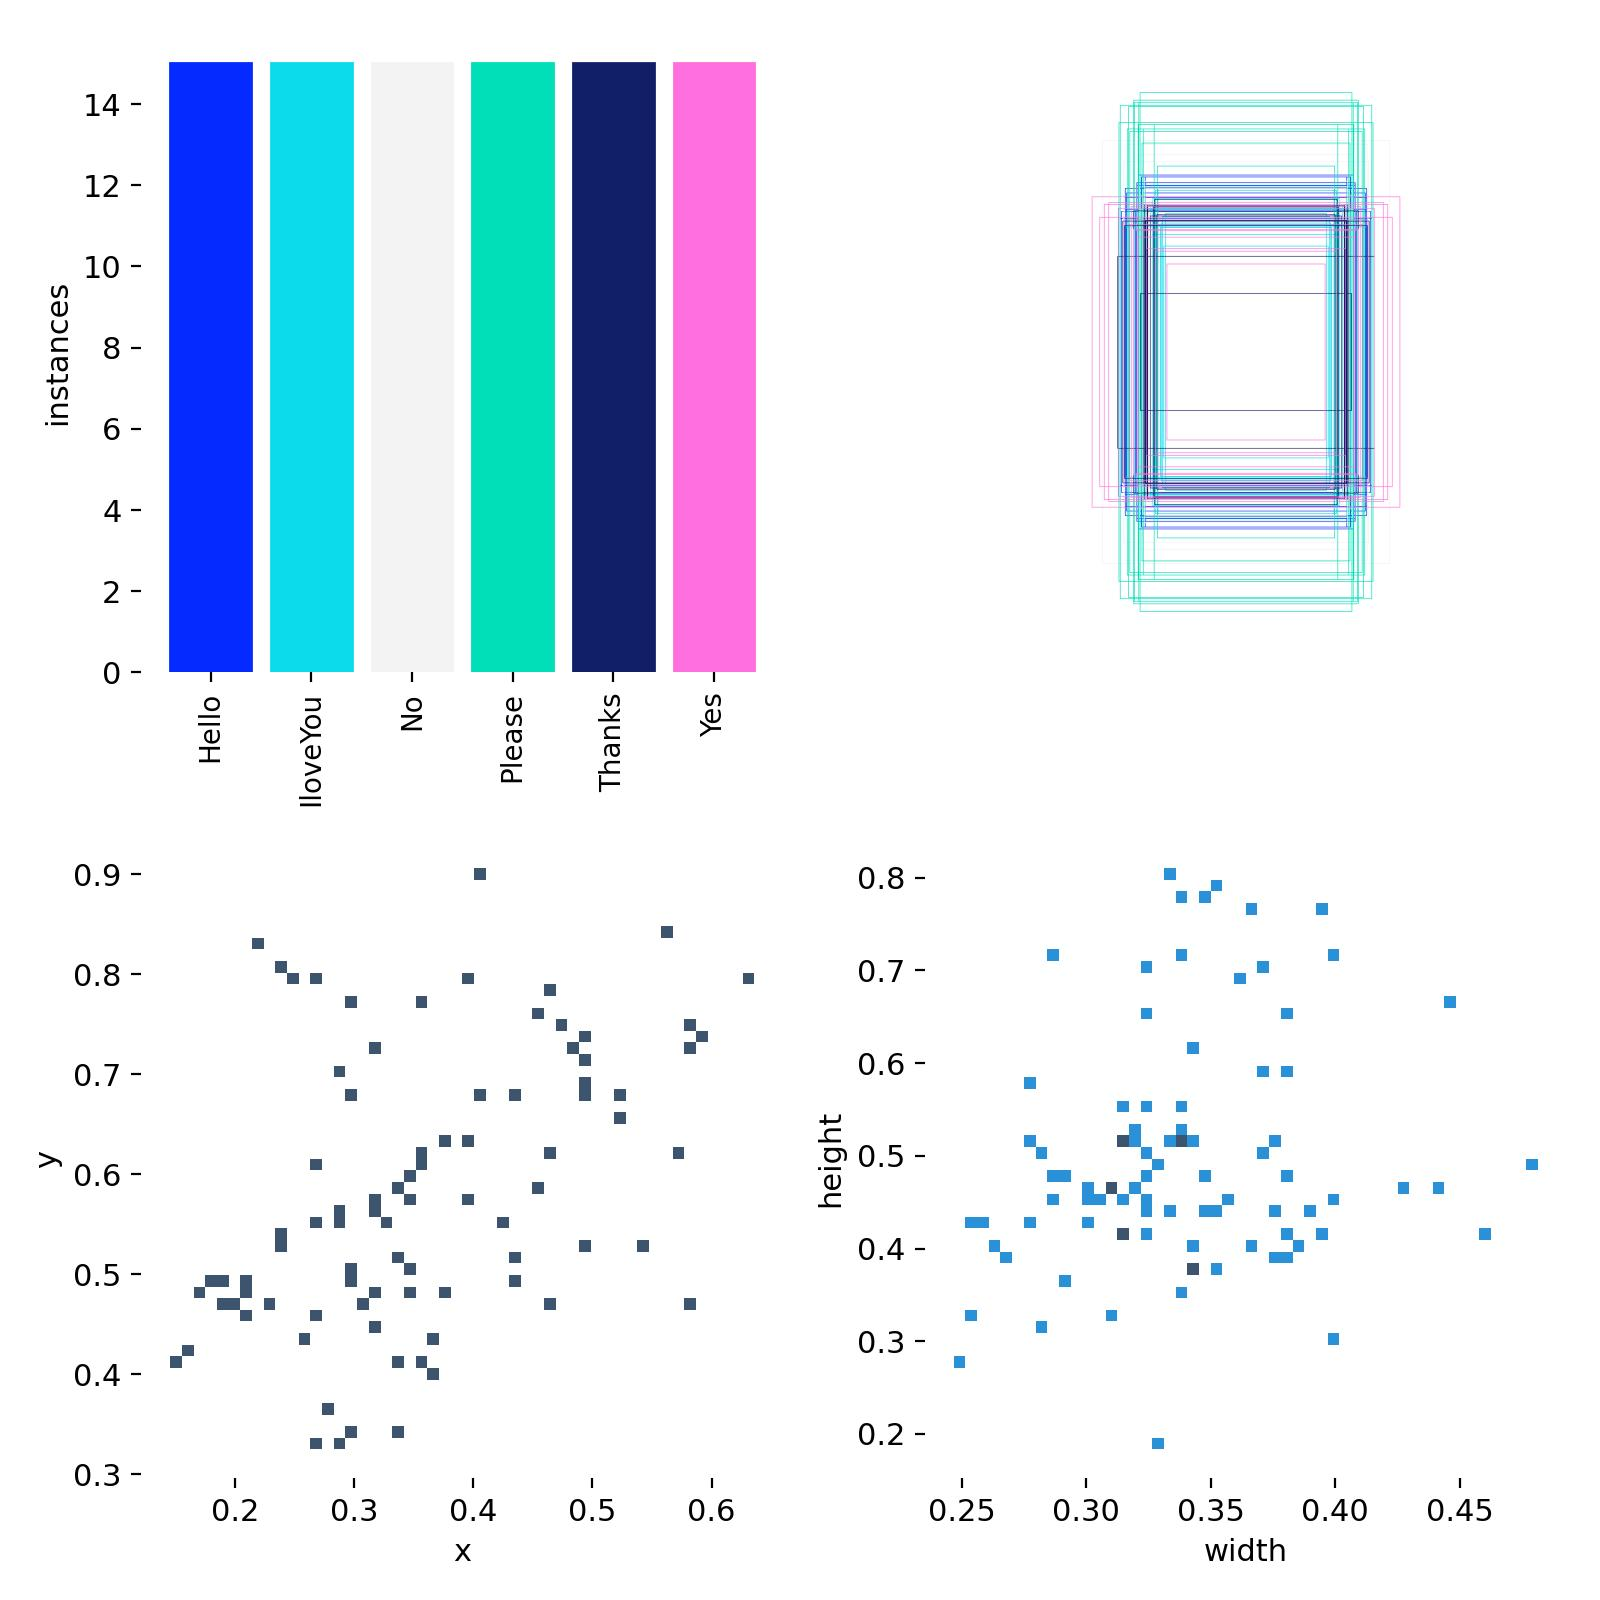

In [7]:
from IPython.display import Image
Image("/content/runs/detect/train/labels.jpg", width=600)

In [8]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/final/test/images" save=True


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/30 /content/final/test/images/Hello.5786279a-9e83-11ef-b7cc-18473dbad030.jpg: 480x640 1 Hello, 49.4ms
image 2/30 /content/final/test/images/Hello.61220ca2-9e83-11ef-89f2-18473dbad030.jpg: 480x640 1 Hello, 8.6ms
image 3/30 /content/final/test/images/Hello.625572c0-9e83-11ef-892b-18473dbad030.jpg: 480x640 1 Hello, 8.8ms
image 4/30 /content/final/test/images/Hello.638919a8-9e83-11ef-bb33-18473dbad030.jpg: 480x640 1 Hello, 8.1ms
image 5/30 /content/final/test/images/Hello.672721ab-9e83-11ef-bf20-18473dbad030.jpg: 480x640 1 Hello, 7.9ms
image 6/30 /content/final/test/images/IloveYou.e7009346-9e83-11ef-835d-18473dbad030.jpg: 480x640 1 IloveYou, 7.9ms
image 7/30 /content/final/test/images/IloveYou.ea9ac741-9e83-11ef-84b9-18473dbad030.jpg: 480x640 1 IloveYou, 7.7ms
image 8/30 /content/final/test/images/IloveYou.ebcdc730-9e

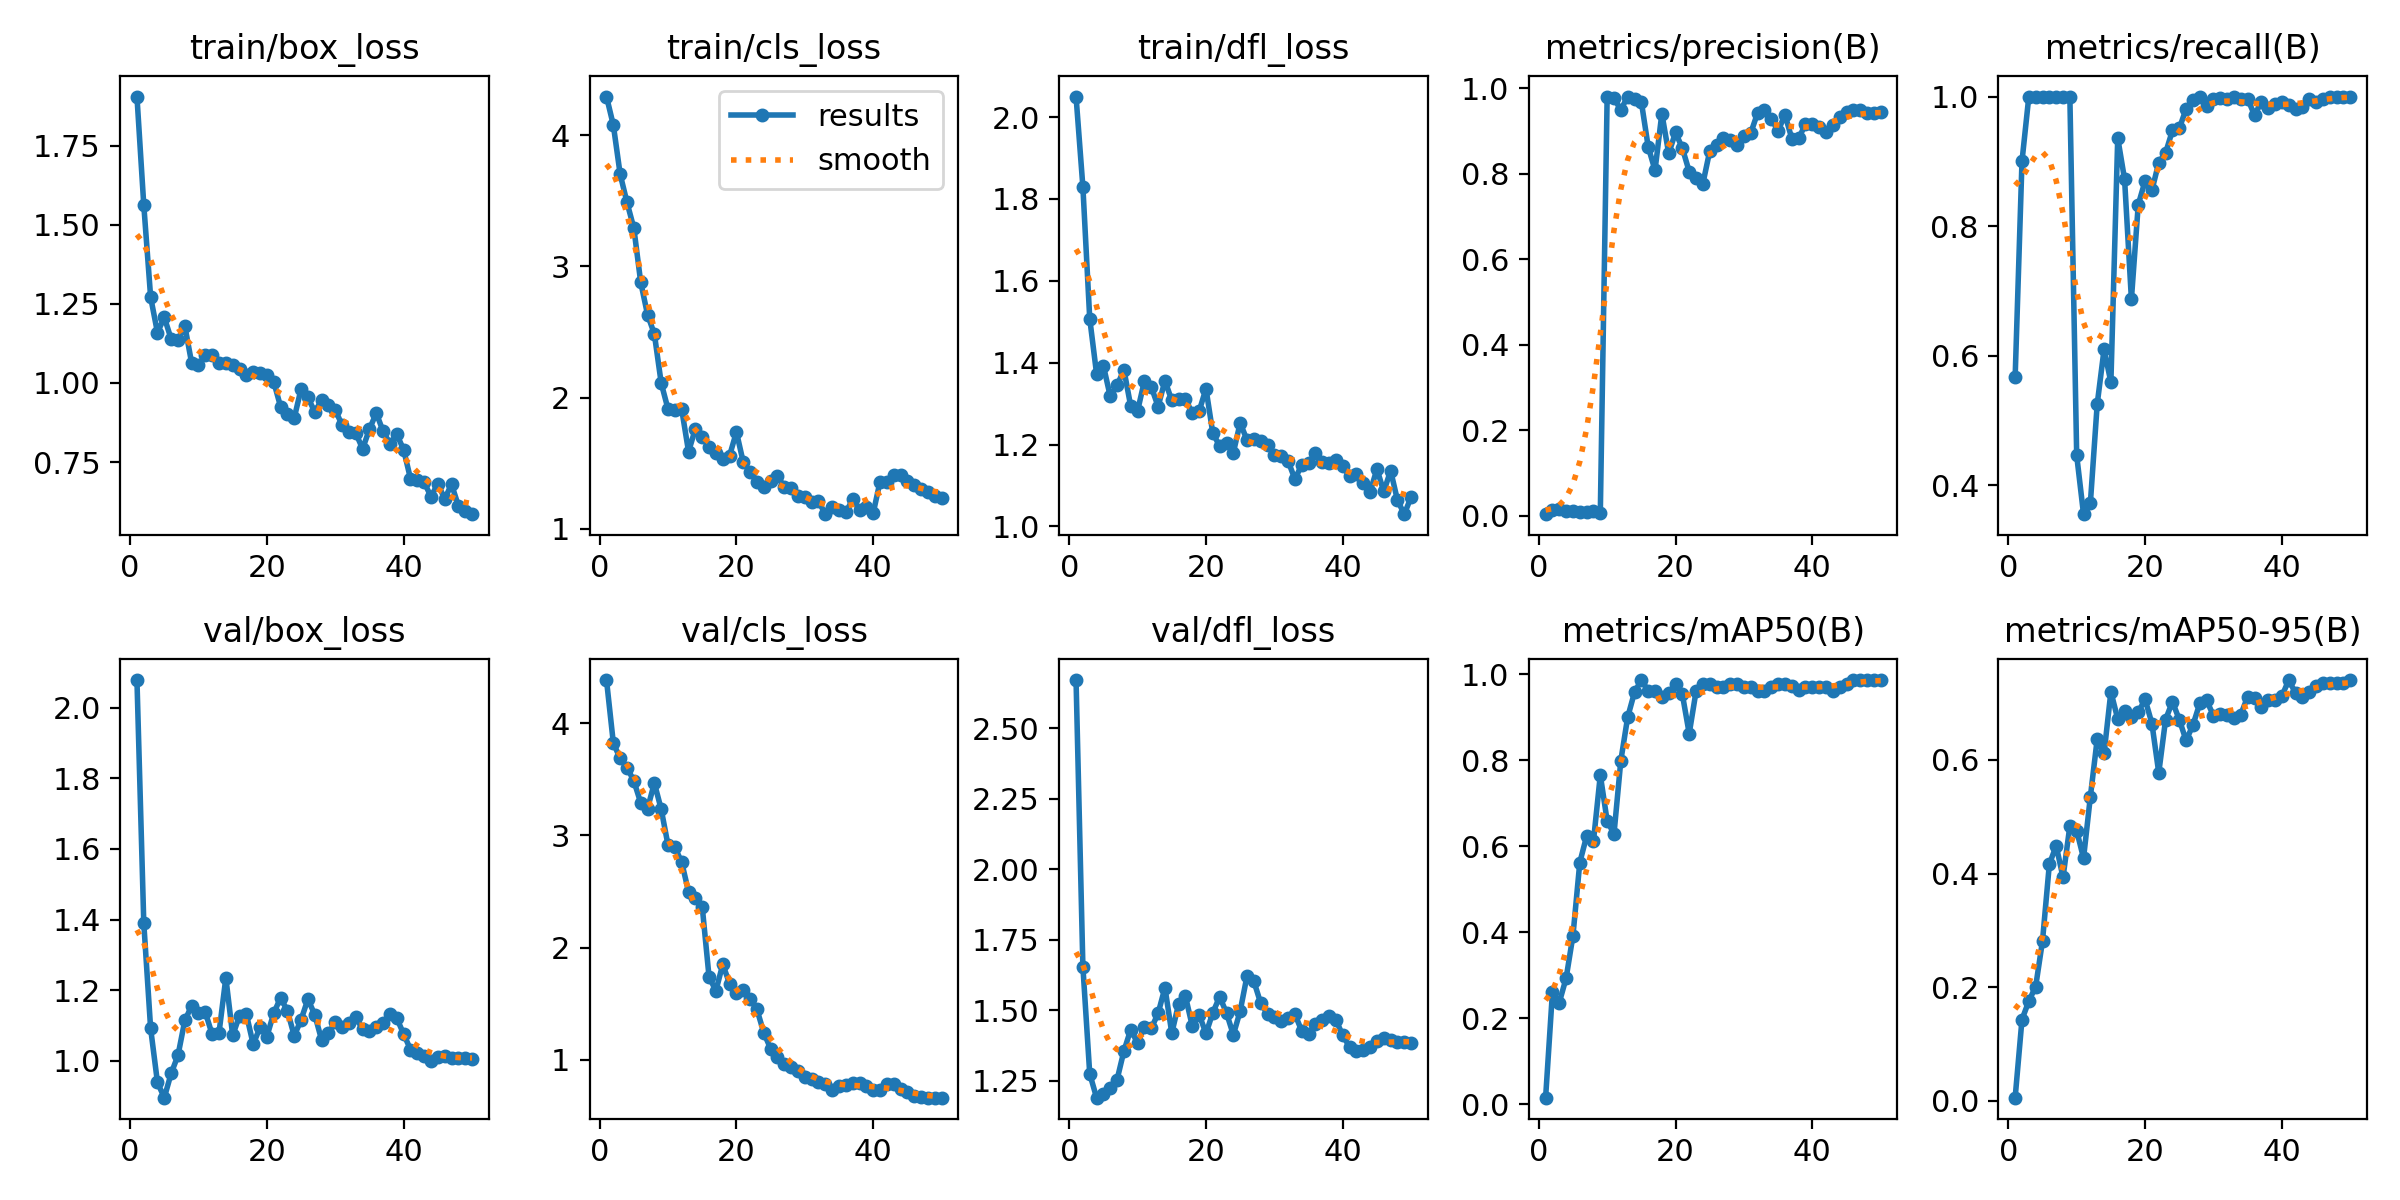

In [9]:
Image("/content/runs/detect/train/results.png", width=600)

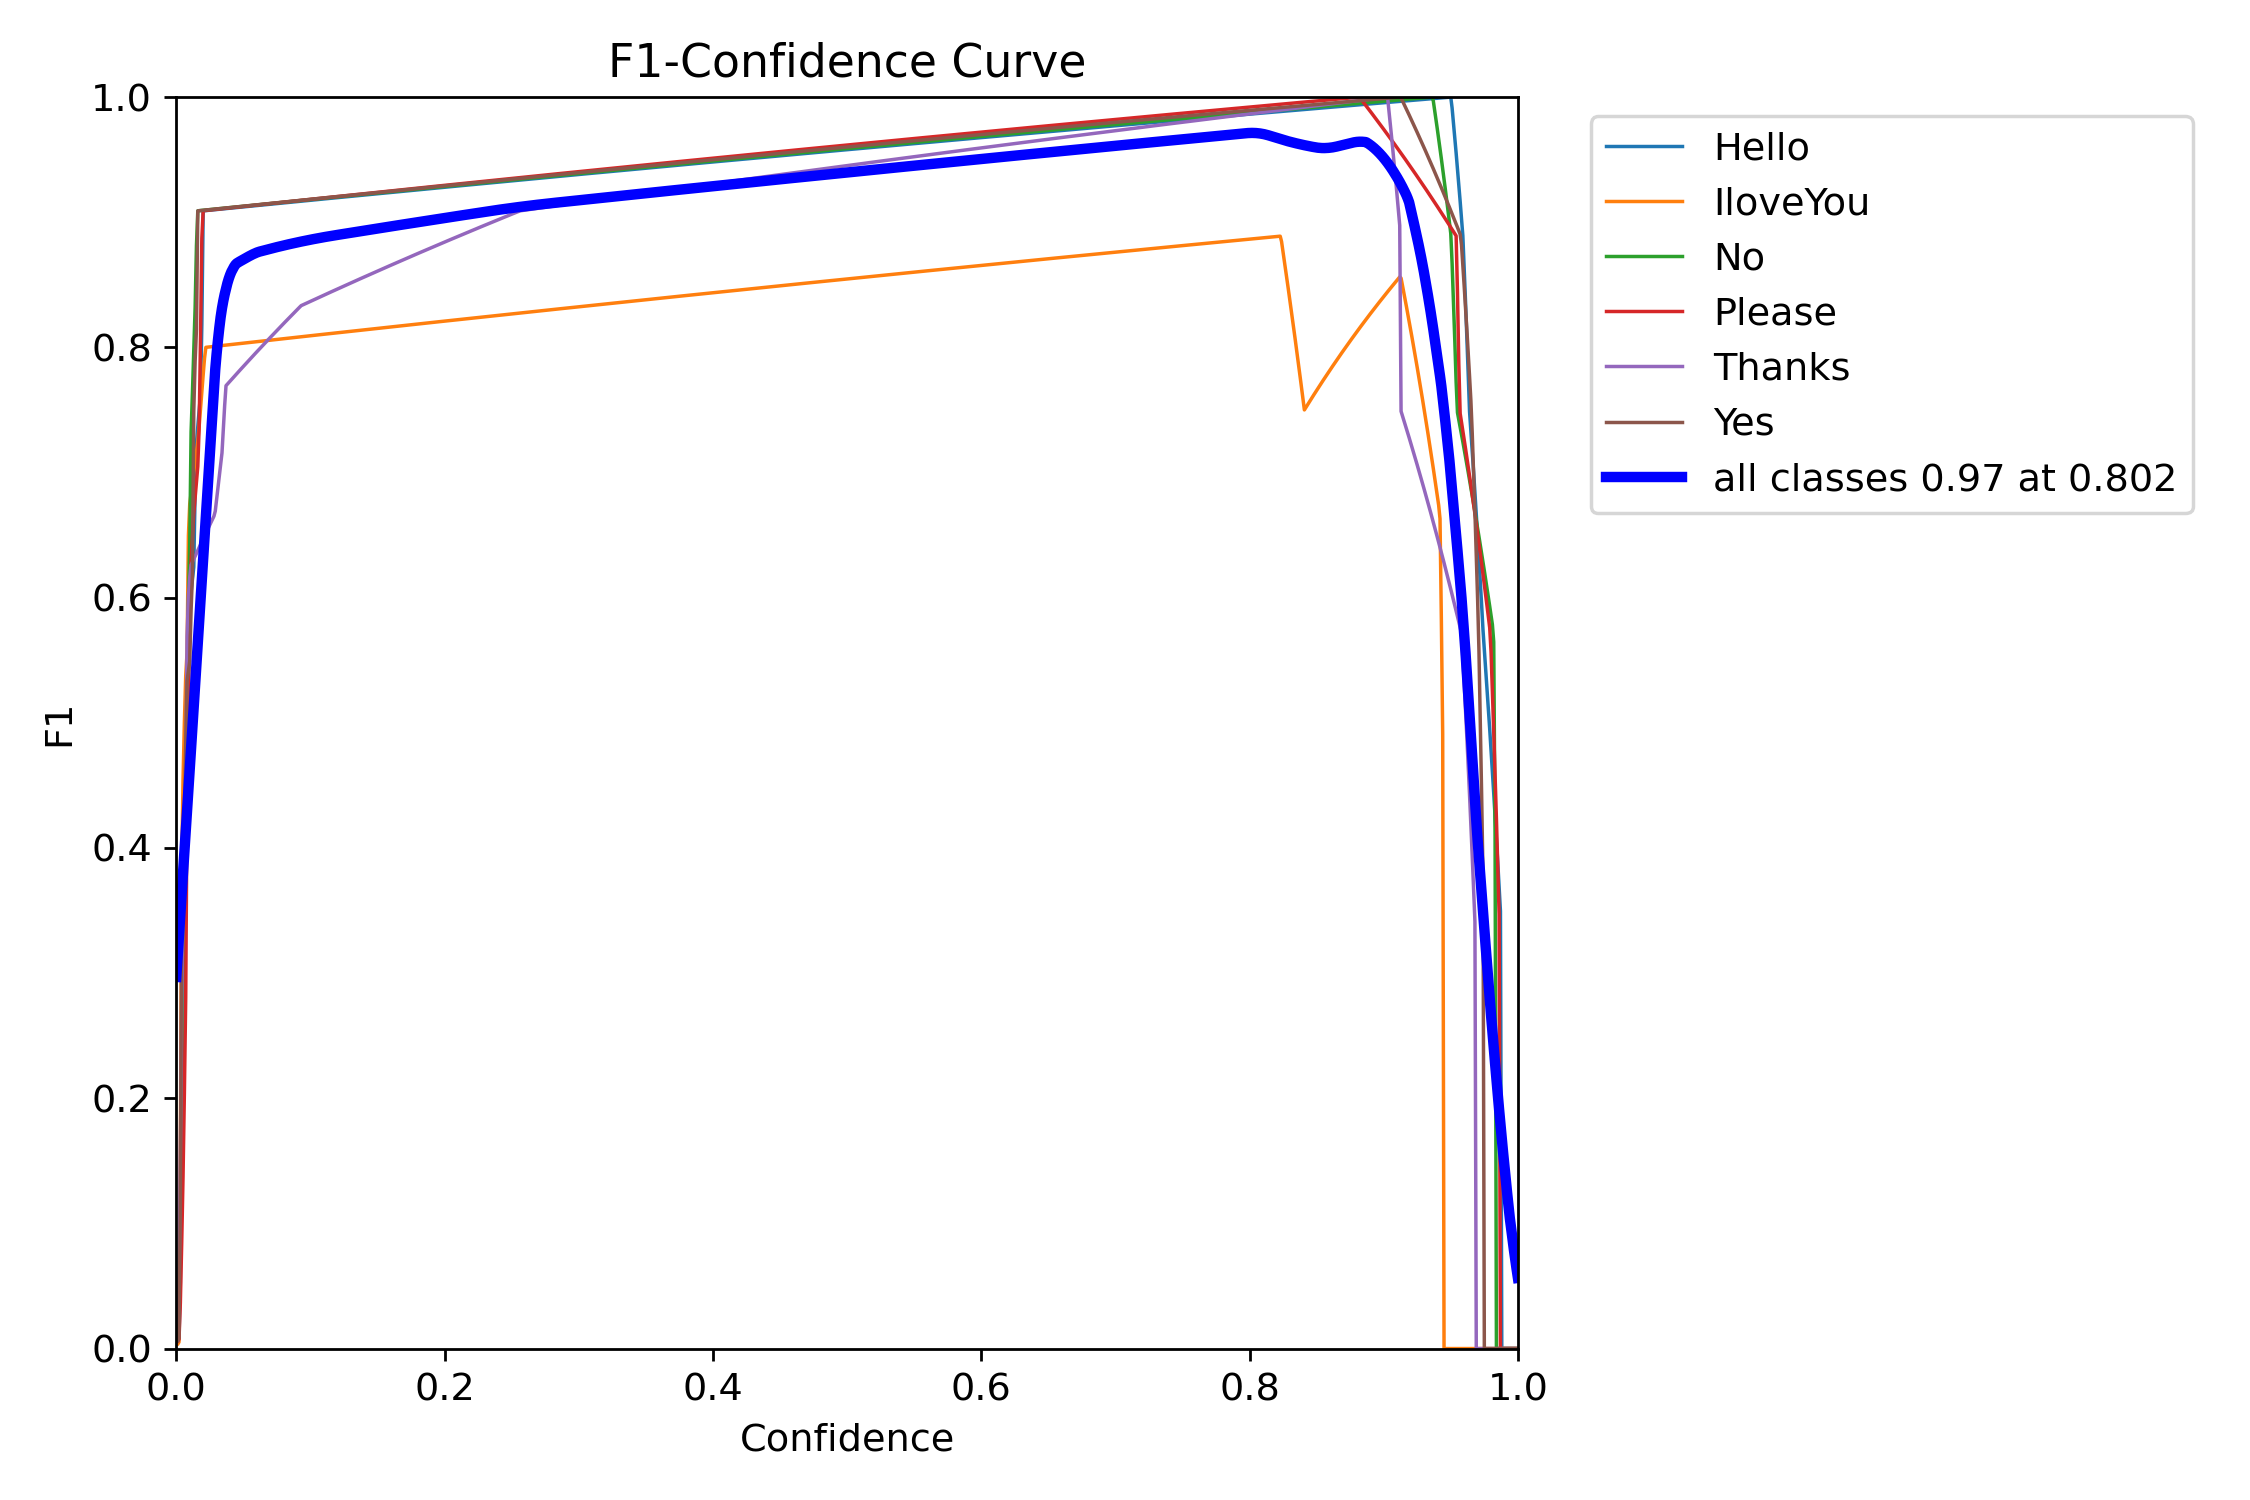

In [10]:
Image("/content/runs/detect/train/F1_curve.png",width = 600)

In [11]:
%ls runs/

detect/


In [12]:
%ls /content/runs/detect/train/weights

best.pt  last.pt


In [22]:
%cd /content/
!python detect.py --weights /runs/detect/train/weights/best.pt --img 416 --conf 0.5 --source /final/test/images

/content
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory


In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
%cp /content/runs/detect/train/weights/best.pt /content/gdrive/MyDrive/sign-language-detector-python-master